# Text data analysis

Make sure to install the `transformers` package before running

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv("./data/sorted_new.csv")

In [ ]:
df.head()

,index,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedBy,Id,Initiated,Event,Text,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText
0,158,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2dc90bf92dde6e0d63c99b,1546504459078,Timeout,NaN,SYSTEM,System,NaN,NaN,True,NaN,NaN
1,825,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2d2042f92dde6e0d623bc7,1546461250000,NaN,U tell me im junior,7605202845,Visitor,43209078.0,43209078.0,True,NaN,U tell me im junior
2,6,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2f9f3a680e5af70640a20c,1546624826051,Timeout,NaN,SYSTEM,System,NaN,NaN,True,NaN,NaN
3,13,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee93e3e1b9890052f246c,1546578238531,NaN,Hi,8168241807,Visitor,29072.0,29072.0,True,29072.0,Hi
4,14,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee95b3e1b9890052f247a,1546578267599,Joined,NaN,DQVCTWMS5aaaaN,Agent,NaN,NaN,True,NaN,NaN


In [ ]:
# get volunteer text
text_only = df[df['ParticipantRole']=='Agent']['Text'].dropna()

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
all_scores = []
sample_text = np.random.choice(text_only.to_list(), size=(1000,))
for text in tqdm(sample_text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    all_scores.append(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


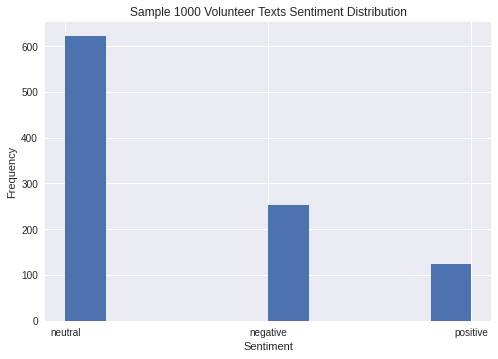

In [ ]:
predictions = np.argmax(all_scores, axis=1)
plt.hist(np.array(labels)[predictions])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title(f'Sample {len(predictions)} Volunteer Texts Sentiment Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


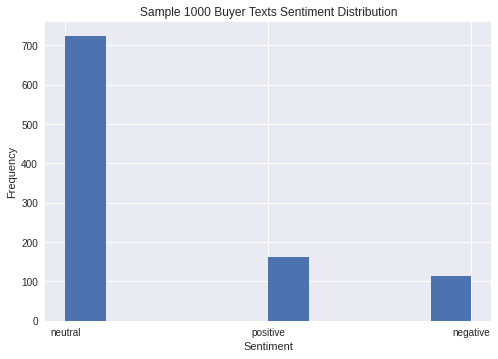

In [ ]:
def buyer_sentiment(n=1000):
    text_only = df[df['ParticipantRole']=='Visitor']['Text'].dropna()
    all_scores = []
    sample_text = np.random.choice(text_only.to_list(), size=(n,))
    for text in tqdm(sample_text):
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        all_scores.append(scores)
    predictions = np.argmax(all_scores, axis=1)
    plt.hist(np.array(labels)[predictions])
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.title(f'Sample {len(predictions)} Buyer Texts Sentiment Distribution')
    plt.show()

buyer_sentiment()

In [ ]:
def volunteer_emotion(n=1000):
    task='emotion'
    MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(MODEL)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    # PT
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    model.save_pretrained(MODEL)

    text_only = df[df['ParticipantRole']=='Agent']['Text'].dropna()
    all_scores = []
    sample_text = np.random.choice(text_only.to_list(), size=(n,))
    for text in tqdm(sample_text):
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        all_scores.append(scores)
    predictions = np.argmax(all_scores, axis=1)
    plt.hist(np.array(labels)[predictions])
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.title(f'Sample {len(predictions)} Volunteer Texts Emotion Distribution')
    plt.show()

def buyer_emotion(n=1000):
    task='emotion'
    MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(MODEL)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    # PT
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    model.save_pretrained(MODEL)

    text_only = df[df['ParticipantRole']=='Visitor']['Text'].dropna()
    all_scores = []
    sample_text = np.random.choice(text_only.to_list(), size=(n,))
    for text in tqdm(sample_text):
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        all_scores.append(scores)
    predictions = np.argmax(all_scores, axis=1)
    plt.hist(np.array(labels)[predictions])
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.title(f'Sample {len(predictions)} Buyer Texts Emotion Distribution')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


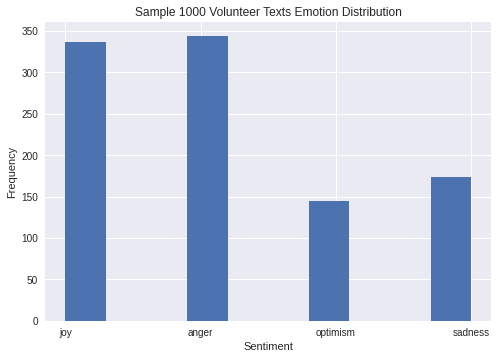

In [ ]:
volunteer_emotion()

In [ ]:
buyer_emotion()

OSError: ignored

In [ ]:
def (n=1000):
    task='emotion'
    MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(MODEL)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    # PT
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    model.save_pretrained(MODEL)

    text_only = df[df['ParticipantRole']=='Agent']['Text'].dropna()
    all_scores = []
    sample_text = np.random.choice(text_only.to_list(), size=(n,))
    for text in tqdm(sample_text):
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        all_scores.append(scores)
    predictions = np.argmax(all_scores, axis=1)
    plt.hist(np.array(labels)[predictions])
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.title(f'Sample {len(predictions)} Volunteer Texts Emotion Distribution')
    plt.show()